# Bees vs Wasps 
## Classification of Bees via convolutional neural networks

"Bees are renowned for their role in providing high-quality food (honey, royal jelly and pollen) and other products used in healthcare and other sectors (beeswax, propolis, honey bee venom). But the work of bees entails much more!

The greatest contribution of bees and other pollinators is the pollination of nearly three quarters of the plants that produce 90% of the world’s food. A third of the world’s food production depends on bees, i.e. every third spoonful of food depends on pollination.

Bees are vital for the preservation of ecological balance and biodiversity in nature. They provide one of the most recognisable ecosystem services, i.e. pollination, which is what makes food production possible. By doing so, they protect and maintain ecosystems as well as animal and plant species, and contribute to genetic and biotic diversity.

Bees also act as indicators of the state of the environment. Their presence, absence or quantity tells us when something is happening with the environment and that appropriate action is needed. By observing the development and health of bees, it is possible to ascertain changes in the environment and implement the necessary precautionary measures in time."



Quelle:<br>
https://www.worldbeeday.org/en/about/the-importance-of-bees.html<br>
https://cdn.britannica.com/45/188945-050-E16A4676/Wasp-bee-insect.jpg

-------------------


This Project focuses on detecting Bees via a **Inception ResNet V2**.
With image augmentation and an Adamax optimizer, an **accuracy of 0.954** has been achieved.

------------
<figure>
<blockquote class="me" cite="https://www.greetingcardpoet.com/bee-quotes-and-sayings/"> 
	If the bee disappeared off the face of the earth,<br /> man would only have four years left to live. 

</blockquote>
<figcaption>Maurice Maeterlinck

</figcaption>
</figure>

![](https://cdn.britannica.com/45/188945-050-E16A4676/Wasp-bee-insect.jpg)


Quelle:<br>
<https://www.worldbeeday.org/en/about/the-importance-of-bees.html><br>
<https://cdn.britannica.com/45/188945-050-E16A4676/Wasp-bee-insect.jpg>

## Imports
All imports needer for this projet are listed below. <br>
 A requirements.txt is added to this repository

In [57]:
import tensorflow as tf
import numpy as np
import pandas as pd
import PIL
import pathlib
import matplotlib.pyplot as plt

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from  tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Resizing, Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow import expand_dims
from tensorflow.keras import Model
from tensorflow.keras.models import load_model

from sklearn import metrics

## GPU Support

In [24]:
tf.config.list_physical_devices('GPU')

[]

## Datensatz Laden
In the following line the dataset is loaded.

In [25]:
data_dir = pathlib.Path("data")
df = pd.read_csv("data/labels.csv")

## Datenanalyse
We can see, that the dataset consists of 11421 Images.
The Images are already sortet into test, validation and trainingsdata.

| Value      | Description           | Datatype  |
| ------------- |:-------------:| -----:|
| id      | unique identifier | value from 0 to 1421 |
| path      | path of the stored image      |   string/path |
| is_bee |  flag if picture shows a bee     |  1 = bee, 0 = no bee |
| is_wasp | flag if picture shows wasp      | 1 = wasp, 0 = no wasp  |
| is_otherinsect | flag if picture shows any other insect      | 1 = other insect, 0 = no other insect|
| is_other | flag if thre is anthing other than wasp, bee or insect on picture     |   1 = any other, 0 = not any other |
| photo_quality | flag for certainty of label      |  0 = uncertain if label is correct, 1 = certain that label is correct |
| is_validation | flag if picture belongs to validation data     | 0 = not validation, 1 = validation |
| is_final_validation | flag if picture belongs to test data      | 0 = not test data, 1 = test data|
| label | label of the picture     |  bee, wasp, insect, other  |


In [26]:
df.head()

,id,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
0,1,bee1\10007154554_026417cfd0_n.jpg,1,0,0,0,1,0,0,bee
1,2,bee1\10024864894_6dc54d4b34_n.jpg,1,0,0,0,1,0,1,bee
2,3,bee1\10092043833_7306dfd1f0_n.jpg,1,0,0,0,1,1,0,bee
3,4,bee1\1011948979_fc3637e779_w.jpg,1,0,0,0,1,0,1,bee
4,5,bee1\10128235063_dca17db76c_n.jpg,1,0,0,0,1,0,0,bee


In [27]:
print(f"There are {sum(df['photo_quality']== 1)} where the label is correct.")
print(f"There are {sum(df['photo_quality']== 0)} where the label might not be correct")

There are 7035 where the label is correct.
There are 4386 where the label might not be correct


In [28]:
print(f"Bee Pictures: {len(df[df['is_bee']==1])}")
print(f"Wasp Pictures: {len(df[df['is_wasp']==1])}")
print(f"Other insect Pictures: {len(df[df['is_otherinsect']==1])}")
print(f"Other Pictures: {len(df[df['is_other']==1])}")
print(f"-----------------------")
print(f"Sum of all pictures {len(df)}")

Bee Pictures: 3183
Wasp Pictures: 4943
Other insect Pictures: 2439
Other Pictures: 856
-----------------------
Sum of all pictures 11421


In [29]:
bees = list(data_dir.glob("bee*/*"))
wasps = list(data_dir.glob("wasp*/*"))
other_insect = list(data_dir.glob("other_insect/*"))
other_noinsect = list(data_dir.glob("other_noinsect/*"))

Below are shown different pictures from the 4 labels.

Text(0.5, 1.0, 'Other 3')

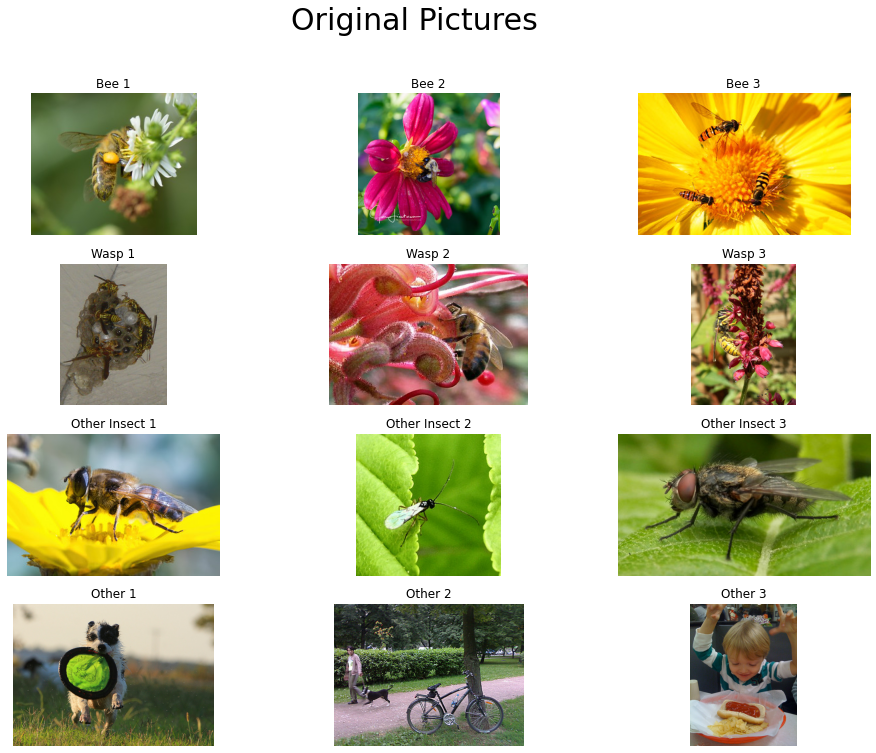

In [30]:

fig, axs = plt.subplots(4,3,figsize=(16,12))
fig.suptitle('Original Pictures', fontsize=30)

axs[0,0].imshow(plt.imread(bees[0]))
axs[0,0].axis("off")
axs[0,0].set_title("Bee 1")

axs[0,1].imshow(plt.imread(bees[1]))
axs[0,1].axis("off")
axs[0,1].set_title("Bee 2")

axs[0,2].imshow(plt.imread(bees[2]))
axs[0,2].axis("off")
axs[0,2].set_title("Bee 3")

#-----------------------------------------------------#

axs[1,0].imshow(plt.imread(wasps[0]))
axs[1,0].axis("off")
axs[1,0].set_title("Wasp 1")

axs[1,1].imshow(plt.imread(wasps[1]))
axs[1,1].axis("off")
axs[1,1].set_title("Wasp 2")

axs[1,2].imshow(plt.imread(wasps[2]))
axs[1,2].axis("off")
axs[1,2].set_title("Wasp 3")


#-----------------------------------------------------#

axs[2,0].imshow(plt.imread(other_insect[0]))
axs[2,0].axis("off")
axs[2,0].set_title("Other Insect 1")

axs[2,1].imshow(plt.imread(other_insect[1]))
axs[2,1].axis("off")
axs[2,1].set_title("Other Insect 2")

axs[2,2].imshow(plt.imread(other_insect[2]))
axs[2,2].axis("off")
axs[2,2].set_title("Other Insect 3")

#-----------------------------------------------------#

axs[3,0].imshow(plt.imread(other_noinsect[0]))
axs[3,0].axis("off")
axs[3,0].set_title("Other 1")

axs[3,1].imshow(plt.imread(other_noinsect[1]))
axs[3,1].axis("off")
axs[3,1].set_title("Other 2")

axs[3,2].imshow(plt.imread(other_noinsect[2]))
axs[3,2].axis("off")
axs[3,2].set_title("Other 3")



## Parameters

Here all important parameters are set. To make the code reproducible a seed has been set throughout the project.

In [40]:
batch_size =32

img_height = 299
img_width = 299

seed = 8 

LABEL_PATH = "data"


## Splitting Train- and Testdata
Here the data is split accodringly to the preset flags alredy provided with the dataset in 3 Parts.
- Trainings data
- Validation data
- Test data

The Model will be trained on the trainingsdata and then evaluated on the validation data.
After the best hyperparameter on the validation set is found, the model will once more tested on the testdata for a final result.

In [41]:
df_validation = df[df["is_validation"]==1]
df_test = df[df["is_final_validation"]==1]
df_train = df[(df["is_validation"] == 0) & (df["is_final_validation"] == 0)]


In [42]:
df['path'] = df['path'].str.replace('\\', "/")

<ipython-input-42-3b8fc7267a19>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['path'] = df['path'].str.replace('\\', "/")


In [83]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

train_dg = data_generator.flow_from_dataframe(df_train, 
                                                directory=LABEL_PATH,
                                                shuffle=True,
                                                class_mode="categorical",
                                                x_col='path', 
                                                y_col='label',
                                                color_mode="rgb",
                                                target_size=(img_width,img_height),
                                                seed=seed) 

validation_dg = data_generator.flow_from_dataframe(df_validation,
                                                    directory=LABEL_PATH,
                                                    shuffle=True,
                                                    class_mode="categorical",
                                                    x_col='path', 
                                                    y_col='label',
                                                    color_mode="rgb",
                                                    target_size=(img_width,img_height),
                                                    seed=seed) 

test_dg = data_generator.flow_from_dataframe(df_test, 
                                            directory=LABEL_PATH,
                                                    class_mode="categorical",
                                                    x_col='path', 
                                                    y_col='label',
                                                    color_mode="rgb",
                                                    target_size=(img_width,img_height),
                                                    seed=seed) 



Found 7939 validated image filenames belonging to 4 classes.
Found 1719 validated image filenames belonging to 4 classes.
Found 1763 validated image filenames belonging to 4 classes.


## Data Scaling

The data will be resized to 299*299 since this is the best input size for the chosen convolutional network.
Furthermore, the data will be scaled to values between 0 and 1 which is beneficial for the convolutional neural network.

The implementation below only demonstrates how this will be done, the actual part will be directly implemented into the convolutional neural network.

In [10]:
resize_and_rescale = Sequential([
  Resizing(img_height, img_width),
  Rescaling(1./255)
])

MIN Pixel Value:0.0
MAX Pixel Value: 1.0


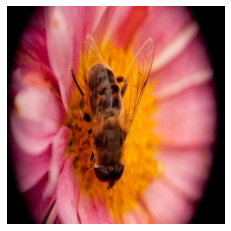

In [11]:
scale = resize_and_rescale(plt.imread(bees[0]))
plt.imshow(scale)
plt.axis("off")
print(f"MIN Pixel Value:{scale.numpy().min()}\nMAX Pixel Value: {scale.numpy().max()}")

## Data Augmentation
In addition to rescaling and resizing, every picture will be flipped  and rotated randomly and a random zoom will be applied.
With this technique the image data will be artificially expanded.


In [12]:
data_augmentation = Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.5),
  RandomZoom(0.4)
])

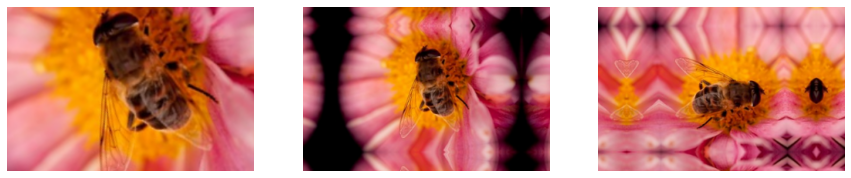

In [13]:
plt.figure(figsize=(15,15))
for i in range(3):
     augmented_image = data_augmentation(tf.expand_dims(plt.imread(bees[0]),0))
     ax = plt.subplot(1,3,i+1)
     plt.imshow(augmented_image[0])
     plt.axis("off")

## Inception ResNet v2

The Inception ResNet V2 seems the most suitable solution for this problem and my Hardware.
This convolutional neural network has achieved a Top 5 95.1% accuracy on the imagenet dataset.

- Bianco, Simone, et al. "Benchmark analysis of representative deep neural network architectures." IEEE Access 6 (2018): 64270-64277.

Furthermore i choose to use the adamax optimizer since it is doing well with the ResNet.
- Kandel, I.; Castelli, M.; Popovič, A. Comparative Study of First Order Optimizers for Image Classification Using Convolutional Neural Networks on Histopathology Images. J. Imaging 2020, 6, 92. https://doi.org/10.3390/jimaging6090092

In [44]:
num_units = len(df['label'].unique())

In [45]:
incres_net = InceptionResNetV2(include_top=False, weights="imagenet", input_shape=(img_height,img_width,3))
incres_net.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

Note: The data augmentation and scaling layers are only applied on the learning process, they are automatically deactivated in validation and prediction.

In [16]:
input = Input(shape=(img_height,img_width,3))
x = RandomFlip("horizontal_and_vertical")(input)
x = RandomRotation(0.5)(x)
x = RandomZoom(0.4)(x)

x = Resizing(img_height, img_width)(x)
x = Rescaling(1./255)(x)

x = incres_net(x)

x = GlobalAveragePooling2D()(x)
output = Dense(units=num_units,activation="softmax")(x)

model = Model(inputs=input,outputs=output)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
random_flip_1 (RandomFlip)   (None, 299, 299, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 299, 299, 3)       0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 299, 299, 3)       0         
_________________________________________________________________
resizing_1 (Resizing)        (None, 299, 299, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 299, 299, 3)       0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, 8, 8, 1536)        543367

In [18]:
model.compile(optimizer=Adamax(learning_rate=1e-05),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy']
             )

In [19]:
early_stopping = EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True)
model_checkpoint = ModelCheckpoint("checkpoint/", monitor="val_loss",save_best_only=True)

history = model.fit(train_dg, 
          validation_data=validation_dg, 
          batch_size=batch_size,
          callbacks = [model_checkpoint,early_stopping],
          epochs=150,
         )

Epoch 1/150
249/249 [==============================] - 191s 661ms/step - loss: 0.8895 - accuracy: 0.7178 - val_loss: 1.4220 - val_accuracy: 0.1995
INFO:tensorflow:Assets written to: checkpoint\assets
Epoch 2/150
249/249 [==============================] - 158s 634ms/step - loss: 0.4159 - accuracy: 0.8807 - val_loss: 0.4030 - val_accuracy: 0.8959
INFO:tensorflow:Assets written to: checkpoint\assets
Epoch 3/150
249/249 [==============================] - 158s 633ms/step - loss: 0.3176 - accuracy: 0.9007 - val_loss: 0.2447 - val_accuracy: 0.9296
INFO:tensorflow:Assets written to: checkpoint\assets
Epoch 4/150
249/249 [==============================] - 172s 691ms/step - loss: 0.2697 - accuracy: 0.9118 - val_loss: 0.2148 - val_accuracy: 0.9348
INFO:tensorflow:Assets written to: checkpoint\assets
Epoch 5/150
249/249 [==============================] - 172s 692ms/step - loss: 0.2455 - accuracy: 0.9188 - val_loss: 0.1960 - val_accuracy: 0.9401
INFO:tensorflow:Assets written to: checkpoint\assets


The model has reached a good accuracy on the validation data in 27 steps (accuracy: 0.9517).
For further improvment there might be a chance to decrese the step size, but for a practical approache this would not matter.

As in the paper above stated, getting higher accuracy with other optimizers is very unlikely.

## Evaluation on validation data

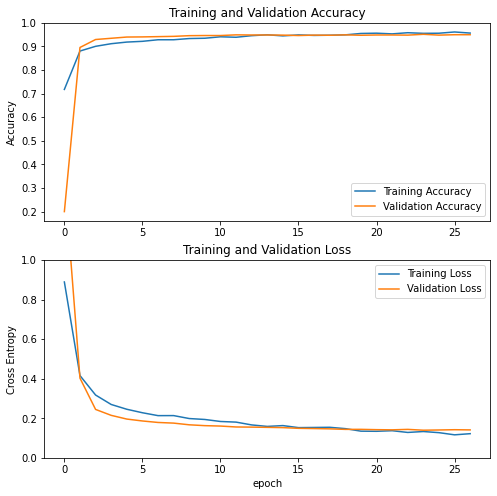

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Evaluation on test data
First the model with the best validation accuracy in the training process will be loaded

In [50]:
model = load_model("checkpoint")

In [51]:
model.evaluate(test_dg)

56/56 [==============================] - 265s 5s/step - loss: 0.1483 - accuracy: 0.9541


[0.14834608137607574, 0.9540556073188782]

The evaluation on the test data shows that the final model generalizes well on the testdata with an  **accuracy of 0.9541** and a **loss of 0.1483**.

The model seems to be pertty robust given that the test accuracy is slightly better than the validation accuracy.

## Additional Sources

### Dataset
- <https://www.kaggle.com/jerzydziewierz/bee-vs-wasp>


### Sources 
- Szegedy, Christian, et al. "Inception-v4, inception-resnet and the impact of residual connections on learning." Proceedings of the AAAI Conference on Artificial Intelligence. Vol. 31. No. 1. 2017

- Kandel, I.; Castelli, M.; Popovič, A. Comparative Study of First Order Optimizers for Image Classification Using Convolutional Neural Networks on Histopathology Images. J. Imaging 2020, 6, 92. https://doi.org/10.3390/jimaging6090092

- Bianco, Simone, et al. "Benchmark analysis of representative deep neural network architectures." IEEE Access 6 (2018): 64270-64277.

- <https://ai.googleblog.com/2016/08/improving-inception-and-image.html>

- <https://paperswithcode.com/method/adamax>

- <https://machinelearningmastery.com/gradient-descent-optimization-with-adamax-from-scratch/>
- <https://paperswithcode.com/sota/image-classification-on-imagenet?metric=Top%205%20Accuracy&tag_filter=3>

